In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rc('font', family='Batang')
PATH = f"사용자수_2021년 1월-10월.csv"
df = pd.read_csv(PATH, parse_dates=['date_id'])
df

,date_id,활성사용자수,활성사용자수(웰컴 및 Event 수신제외),신규사용자수,재방문사용자수,누적사용자수
0,2021-01-01,1,1,0,1,1331
1,2021-01-02,1,1,0,1,1331
2,2021-01-03,4,4,1,3,1332
3,2021-01-04,49,49,0,49,1332
4,2021-01-05,54,54,2,52,1334
...,...,...,...,...,...,...
292,2021-10-26,302,302,6,296,2804
293,2021-10-27,264,263,6,258,2810
294,2021-10-28,262,262,4,258,2814
295,2021-10-29,195,195,2,193,2816


In [16]:
import datetime
def get_days(date): # 요일 구하는 함수
    date = list(map(int, date.split('-')))
    days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    return days[datetime.date(date[0], date[1], date[2]).weekday()]

In [17]:
user = df.query("date_id.dt.dayofweek < 5")
user

,date_id,활성사용자수,활성사용자수(웰컴 및 Event 수신제외),신규사용자수,재방문사용자수,누적사용자수
0,2021-01-01,1,1,0,1,1331
3,2021-01-04,49,49,0,49,1332
4,2021-01-05,54,54,2,52,1334
5,2021-01-06,63,62,5,58,1339
6,2021-01-07,64,64,5,59,1344
...,...,...,...,...,...,...
291,2021-10-25,305,261,6,299,2798
292,2021-10-26,302,302,6,296,2804
293,2021-10-27,264,263,6,258,2810
294,2021-10-28,262,262,4,258,2814


In [18]:
user_holiday = user[(user['date_id'] == '2021-01-01') | (user['date_id'] == '2021-02-11') | (user['date_id'] == '2021-02-12') |
                    (user['date_id'] == '2021-03-01') | (user['date_id'] == '2021-05-05') | (user['date_id'] == '2021-05-19') |
                    (user['date_id'] == '2021-09-20') | (user['date_id'] == '2021-09-21') | (user['date_id'] == '2021-09-22') ].index
users = user.drop(user_holiday)

In [19]:
users

,date_id,활성사용자수,활성사용자수(웰컴 및 Event 수신제외),신규사용자수,재방문사용자수,누적사용자수
3,2021-01-04,49,49,0,49,1332
4,2021-01-05,54,54,2,52,1334
5,2021-01-06,63,62,5,58,1339
6,2021-01-07,64,64,5,59,1344
7,2021-01-08,33,33,1,32,1345
...,...,...,...,...,...,...
291,2021-10-25,305,261,6,299,2798
292,2021-10-26,302,302,6,296,2804
293,2021-10-27,264,263,6,258,2810
294,2021-10-28,262,262,4,258,2814


In [54]:
# 월별 사용자 수의 평균
users['month'] = users['date_id'].dt.to_period('M')
month_mean = users.groupby('month').mean().reset_index()
month_user = month_mean['활성사용자수']
month_user

0     53.200000
1     37.666667
2    205.666667
3    225.545455
4    201.388889
5    168.818182
6    113.045455
7     86.904762
8    173.947368
9    280.095238
Name: 활성사용자수, dtype: float64

Text(0.5, 1.0, '월별 평균 사용자 수')

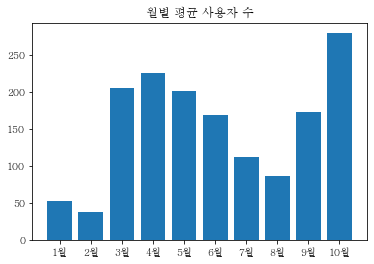

In [68]:
months = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월']
plt.bar(months, month_user)
plt.title('월별 평균 사용자 수')

In [97]:
# 종강, 개강 기준으로 나누기
vacation = (month_user[0]+month_user[1]+month_user[6]+month_user[7])/4 # 종강 후인 1,2,7,8월
semester = (month_user[2]+month_user[3]+month_user[4]+month_user[5]+month_user[8]+month_user[9])/6 # 개강 후인 3,4,5,6,9,10월

<BarContainer object of 2 artists>

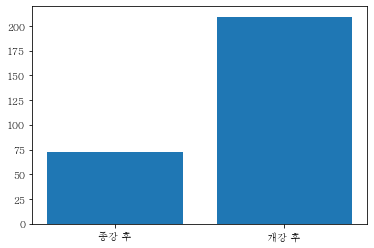

In [102]:
a = ['종강 후', '개강 후']
plt.bar(a, (vacation, semester))